# Project 1 - Simulating Endangered Populations

Copyright 2018. Duncan Mazza and Aditya Sudhakar 

*No model is correct, but some are useful

In [1]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim library
from modsim import *
from pandas import read_html 

In [2]:
def plot_results(system, state, final_results, title):
    """Plot the estimates and the model.
    
    census: TimeSeries of population estimates
    un: TimeSeries of population estimates
    timeseries: TimeSeries of simulation results
    title: string
    """
    plot()
    plot()
    if len(timeseries):
        plot(timeseries, color='gray', label='model')
    
    decorate(xlabel='', 
             ylabel='',
             title=title)

## Can we predict whether an endangered species will survive in a given amount of time? 

We live in a time of decreasing bio-diversity and increasing numbers of endangered species. When taking conservational measures with a species, it is important to make predictions about the future of the species. Existing metrics for this exist - notably, the MVP, or minimum viable population. The minimum viable population (specifically the MVPa metric) refers to, "A is the minimum viable adult population size as estimated from the available data regardless of study length," according to the paper cited at the end of the essay. 

What our model aims to do is predict for a given population of animals with known birth/death rates and MVPa values whether they will reach that MVPc threshold within 20 years. Essentially, can we expect that the population will reach a minimum threshold for survivability within the next 20 years? 

Our model will produce a graph that plots aforementioned probability versus the given population. To determine the parameters used for our model, we will examine the whooping crane (*grus americana*). The parameters are:
1. Population growth rate:
    This is determined from the population graph of the whooping crane obtained from the center for biological diversity. We used the population of 150 from 1995 and the population of 450 from 2015 to obtain a grwoth of 300 cranes over the last 20 years. Fit to an exponential model (which the population graph follows), the year-over-year growth rate was approximately 5.65%:


In [3]:
# code to show how we got to the 5.65% value

2. MVPa value:
    The study (cited at the end) lists the MVPa value for the whooping crane to be 1131 cranes. This will be used as the threshold for success in our model. The final output will be a probability, and that proability is determined by the number of successes and failures. 
    
We will store these parameters as follows:

In [4]:
system = System(t_0 = 0,
                t_final = 20,
                growth_rate = 0.0565
                )
init_pop = 500

state = State(pop = 0, succ = 0, p_succ = 0, pop_20 = 0, mvpa =  1131)
#http://www.wec.ufl.edu/academics/courses/wis4554/WebUpdate/ReadingsWIS5555/PVA/Reed%20et%20al%20PVA%20estimates%202003BiolCons113_23.pdf


,values
pop,0
succ,0
p_succ,0
pop_20,0
mvpa,1131


Here we establish `run_simulation1` which simulates population increase for the first year, and `run_simulation_2_20` which simulates the population increase for the next twenty years. These are separate functions so the first one can set the population value (which is being swept) back to the starting value and the fucntion doesn't compound itself when being run.

In [5]:
def run_simulation1(state, system, init_pop):
   #this function is for computing the population for the first year             
    
    state.pop = int(init_pop)
    
    for i in range (state.pop): #make this a variable!
       
        if flip(system.growth_rate):
            state.pop += 1
    
    return state.pop

def run_simulation2_20(state, system):
    
    for i in range (state.pop): #make this a variable!
       
        if flip(system.growth_rate):
            state.pop += 1
    
    return state.pop

`run_simulation20` runs the two prior functions such that an ending population is procured stochastically from the initial population.  

In [6]:
def run_simulation20(state, system, init_pop):
    #this function is for computing the final population at the end of the twenty years
    for i in linrange(1,20,1): #Can we not hardcode this?
        
        if i == 1:
            state.pop_20 = run_simulation1(state, system, init_pop) 
        if i >= 2:
            state.pop_20 = run_simulation2_20(state, system)
    
    return state.pop_20

This stores the final population at the end of a 20 year simulation in a variable called final:

In [32]:
final = run_simulation20(state, system, init_pop)
init_pop = 300

300

As `run_many_times` suggests, the simulation will be run many (100) times to generate a stochastic time series of data. A probability is calculated from the number of times the population meets or exceeds the MVPa threshold. 

In [33]:
record = TimeSeries()
def run_many_times(state, system, record):
    state.succ = 0
    
    for i in range(5):
        record[i] = run_simulation20(state, system, init_pop)
    
        if record[i] >= state.mvpa:
            state.succ += 1
    

    state.p_succ = float(state.succ / 5.0)
    return state
            
#state.p_succ = run_many_times(state, system, record)
#print(state.p_succ)


In [34]:
state

,values
pop,0
succ,5
p_succ,1
pop_20,1060
mvpa,1131


Finally, we sweep the starting population size to see how likely a given population size of the whooping crane is to meet the MVPa threshold. 

In [23]:
init_pop_array = linrange(420, 440, 1)

final_results = SweepSeries()

for init_pop in init_pop_array:
    
    state = run_many_times(state, system, record)
    final_results[init_pop] = float(state.p_succ)

Here, we graph the results (probability of success vs. starting population) and highlight the probability for the known population of the whooping crane.

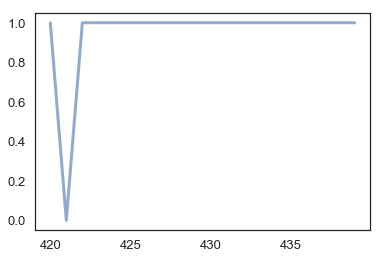

In [24]:
plot(final_results)

https://www.esasuccess.org/2016/index.html
http://www.wec.ufl.edu/academics/courses/wis4554/WebUpdate/ReadingsWIS5555/PVA/Reed%20et%20al%20PVA%20estimates%202003BiolCons113_23.pdf
    

In [25]:
final_results

,values
420,1.0
421,0.0
422,1.0
423,1.0
424,1.0
425,1.0
426,1.0
427,1.0
428,1.0
429,1.0
